In [50]:
# Importing Libraries and Packages
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 

In [51]:
#Reading the CSV/dropping null values and its value 
df = pd.read_csv('winequality-red.csv')
df1 = df.dropna()
df2 = df1.values 

In [52]:
# Separating Dataset into Features and Target Variables
# X: (First 11 Columns)
# y: (Column 12)
X = df2[:, :11]
y = df2[:, 11]


In [101]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)

In [121]:
# Fitting Data Into Regression Object
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)

# Predicting output based on fitted model
y_hat = regr.predict(x_train)

# Measuring Error
RSS = np.sum((y_hat-y_train)**2)
TSS = np.sum((y_train-np.mean(y_train))**2)
Rsq = 1 - RSS/TSS

print("R^2 = {0:f}".format(1-RSS/TSS))



R^2 = 0.364965


In [123]:
#Instead using the method above where values were
#continuous, we decided to round our yhat values 
#accordingly 
regr = linear_model.LinearRegression()
regr.fit(x_train,y_train)
y_hat_round = np.around(regr.predict(x_train))


# Measuring Error
RSS = np.sum((y_hat_rounded-y_train)**2)
TSS = np.sum((y_train-np.mean(y_train))**2)
Rsq = 1 - RSS/TSS
print("R-square value (rounded):",Rsq)

y_hat_rounded = np.around(y_hat)
acc_train_round = np.mean(y_hat_rounded == y_train)
print("Accuracy for training set (rounded):", acc_train_round)


R-square value (rounded): 0.24556966186256823
Accuracy for training set (rounded): 0.5973416731821736


In [126]:
#Test Data, Not Rounded 
y_hat_test = regr.predict(x_test)

RSS = np.sum((y_hat_test-y_test)**2)
TSS = np.sum((y_test-np.mean(y_test))**2)
Rsq = 1 - RSS/TSS

print("R^2 = {0:f}".format(1-RSS/TSS))


R^2 = 0.324029


In [129]:
#Test Data, Rounded 
y_hat_test_rounded = np.around(y_hat_test)

acc_train_round = np.mean(y_hat_test_rounded == y_test)
print("Accuracy:",acc_train_round)

Accuracy: 0.559375


In [151]:
#Ridge Regression
alpha_vals = [0, 0.001, 0.01, 0.1, 10, 100, 10000, 1000000]
for alpha in alpha_vals: 
    regr_ridge = linear_model.Ridge(alpha)
    regr_ridge.fit(x_train, y_train)
    y_hat_ridge = regr_ridge.predict(x_train)
    y_hat_ridge_rounded = np.around(y_hat_ridge)
    acc_train_ridge = np.mean(y_hat_ridge_rounded == y_train)
    print("Alpha:",alpha,"\t","Accuracy:",acc_train_ridge)

Alpha: 0 	 Accuracy: 0.5973416731821736
Alpha: 0.001 	 Accuracy: 0.5973416731821736
Alpha: 0.01 	 Accuracy: 0.5973416731821736
Alpha: 0.1 	 Accuracy: 0.5973416731821736
Alpha: 10 	 Accuracy: 0.5973416731821736
Alpha: 100 	 Accuracy: 0.5957779515246286
Alpha: 10000 	 Accuracy: 0.4401876465989054
Alpha: 1000000 	 Accuracy: 0.3940578577013292


In [153]:
#Lasso Regression
alpha_vals = [0, 0.001, 0.01, 0.1, 10, 100, 10000, 1000000]
for alpha in alpha_vals: 
    regr_lasso = linear_model.Lasso(alpha)
    regr_lasso.fit(x_train, y_train)
    y_hat_lasso = regr_lasso.predict(x_train)
    y_hat_lasso_rounded = np.around(y_hat_lasso)
    acc_train_lasso = np.mean(y_hat_lasso_rounded == y_train)
    print("Alpha:",alpha,"\t","Accuracy:",acc_train_lasso)

Alpha: 0 	 Accuracy: 0.5973416731821736
Alpha: 0.001 	 Accuracy: 0.5981235340109461
Alpha: 0.01 	 Accuracy: 0.5918686473807663
Alpha: 0.1 	 Accuracy: 0.5691946833463644
Alpha: 10 	 Accuracy: 0.3940578577013292
Alpha: 100 	 Accuracy: 0.3940578577013292
Alpha: 10000 	 Accuracy: 0.3940578577013292
Alpha: 1000000 	 Accuracy: 0.3940578577013292
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.88231727831754, tolerance: 0.08562752150117284
  positive)


Text(0.5, 0, 'Features')

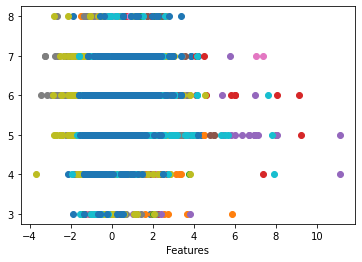

In [80]:
plt.plot(x_train,y_train,'o')
plt.xlabel("Features")